In [48]:
import json
import matplotlib.pyplot as plt
import numpy as np

from phd import viz
import sys
import os
import traceback

colors, swatches = viz.phd_style(jupyterStyle=True, grid=True)
%config InlineBackend.figure_formats = ['svg']

from IPython.display import JSON

# 8 nm filter dataset

In [30]:
chA_list_str = ['35: 1549.32 nm',
               '36: 1548.51 nm',
               '37: 1547.72 nm',
               '38: 1546.92 nm',
               '39: 1546.12 nm',
               '40: 1545.32 nm',
               '41: 1544.53 nm',
               '42: 1543.73 nm']
chB_list_str = ['52: 1535.82 nm',
                '53: 1535.04 nm',
                '54: 1534.25 nm',
                '55: 1533.47 nm',
                '56: 1532.68 nm',
                '57: 1531.90 nm',
                '58: 1531.12 nm',
                '59: 1530.33 nm']




In [31]:
# data_set = {}
# chA_list = [35,36,37,38,39,40,41,42]
# chB_list = [52,53,54,55,56,57,58,59]
# for chA in chA_list:
#     data_set[chA] = {}
#     path = "../data/"
#     for chB in chB_list:
#         try:
#             with open(os.path.join(path, f"ent_data_ch{chA}_{chB}.json"), 'r') as file:
#                 data = json.load(file)
#                 data_set[chA][chB] = data
#         except:
# #             traceback.print_exc()
#             data = {}
#             data_set[chA][chB] = data

In [61]:
data_set = {}
chA_list = [35,36,37,38,39,40,41,42]
chB_list = [52,53,54,55,56,57,58,59]
for chA in chA_list:
    data_set[chA] = {}
    path = "../data_8/"
    for chB in chB_list:
        try:
            with open(os.path.join(path, f"4.0A_{chA}_{chB}.json"), 'r') as file:
                data = json.load(file)
                data_set[chA][chB] = data
        except:
#             traceback.print_exc()
            data = {}
            data_set[chA][chB] = data

In [64]:
[item["name"] for item in data_set[42][54]["results"]] # the 4.0A integrate is action number 7

JSON(data_set[42][54]["results"])

<IPython.core.display.JSON object>

In [71]:
cleaned_data_set = {}
a = True
for chA in chA_list:
    cleaned_data_set[chA] = {}
    for chB in chB_list:
        try:
            # some data sets have an extra wait, and others don't. So the integrat
            # I'm interested in (4.0A integrate) is either at index 7 or 8
            if data_set[chA][chB]["results"][7]["name"] == "Integrate":
                cleaned_data_set[chA][chB] = data_set[chA][chB]["results"][7]
            if data_set[chA][chB]["results"][8]["name"] == "Integrate":
                cleaned_data_set[chA][chB] = data_set[chA][chB]["results"][8]
            # if a:
            #     a1 = data_set[chA][chB]["results"]
            #     a = False
        except:
            cleaned_data_set[chA][chB] = {}
            
# JSON(a1)

In [79]:
cleaned_data_set[35][59]

{'name': 'Integrate',
 'counts': 345,
 'delta_time': 2.0346806049346924,
 'coincidences': 51198,
 'singles_rate_1': 1135414.5679656444,
 'singles_rate_2': 1011123.8073486399,
 'coincidence_rate': 25162.671662485973}

In [108]:
# cleaned_data_set = {}

Set = np.zeros((8,8))
# print(Set)

for i, chA in enumerate(chA_list):
    for j, chB in enumerate(chB_list):
        # print(cleaned_data_set[chA][chB])
        # print(chA)
        # print(chB)
        try:
            Set[i, j] = cleaned_data_set[chA][chB]["coincidence_rate"]
        except:
            pass
            

Set = Set/1000
Set = np.rot90(Set)
Set = np.flip(Set)
Set = (Set/6)*16
Set = Set.round(2)
print(Set)
# Set = np.flip(Set, axis=1)

[[57.03 36.42  9.17  0.    0.    0.    0.    0.  ]
 [20.06 51.76 41.65  6.78  0.    0.    0.    0.  ]
 [ 2.34 19.28 70.8  41.06 10.53  0.    0.    0.  ]
 [ 0.    1.31 21.95 58.2  47.08  8.19  0.    0.  ]
 [ 0.    0.    2.54 21.49 64.11 39.75  9.51  0.  ]
 [ 0.    0.    0.    2.32 24.5  63.22 45.92  8.11]
 [ 0.    0.    0.    0.    2.26 21.36 59.46 40.19]
 [ 0.    0.    0.    0.    0.    2.47 22.5  67.1 ]]


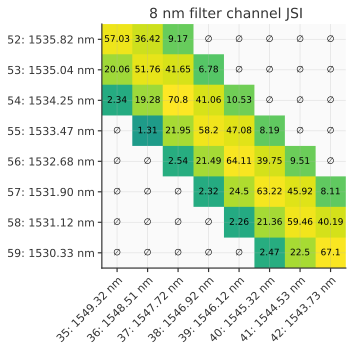

In [110]:
import matplotlib.colors as colors
viz.update_colors()
# plt.rc('text', usetex=True)

# chA_list_str = []
# chB_list_str = []
# for i in range(len(chA_list)):
#     chA_list_str.append(str(chA_list[i]))
# for i in range(len(chB_list)):
#     chB_list_str.append(str(chB_list[i]))

# fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.set_xticklabels([str(i) for i in chB_list])
# ax.set_yticklabels([str(i) for i in chA_list])
# extent = [chB_list[0]-0.5,chB_list[-1]+0.5, chA_list[-1]+0.5, chA_list[0]-0.5]

fig, ax = plt.subplots(1,1,figsize = (5,5))
Set = np.array(Set)
im = ax.imshow(Set,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

ax.set_xticks(np.arange(len(chA_list)))
ax.set_yticks(np.arange(len(chB_list)))
ax.set_xticklabels(chA_list_str)
ax.set_yticklabels(chB_list_str)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set[i][j] == 0:
            label = '∅'
        else:
            label = Set[i][j]
        text = ax.text(j, i, label,
                       ha="center", va="center", 
                       color="black", size=9)
ax.set_title(" 8 nm filter channel JSI")

fig.tight_layout()
# plt.savefig("2nm_jsi_light.svg")
plt.show()


<BarContainer object of 8 artists>

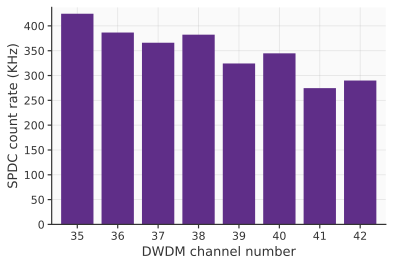

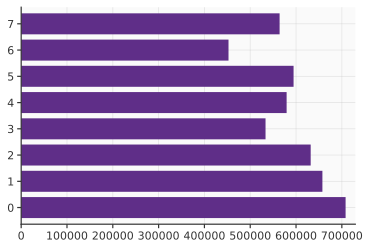

In [41]:
chA_raw = []
for chA in chA_list:
    counts = []
    for chB in chB_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][0])
        except:
            pass
    chA_raw.append(np.average(np.array(counts)))
# print(chA_raw)

# print("################################################")
# print("################################################")
chB_raw = []
for chB in chB_list:
    counts = []
    for chA in chA_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][1])
        except:
            pass
#     print(counts)
    chB_raw.append(np.average(np.array(counts)))
chB_raw = np.array(chB_raw)
chA_raw = np.array(chA_raw)
plt.figure()
plt.bar(np.arange(len(chA_raw)) + 35, chA_raw/1000)
plt.xlabel("DWDM channel number")
plt.ylabel("SPDC count rate (KHz)")
plt.figure()
plt.barh(np.arange(len(chB_raw)), chB_raw)

In [42]:
Set

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.87, 11.92, 20.05],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  2.34, 14.69, 18.61,  7.44],
       [ 0.  ,  0.  ,  0.  ,  3.38, 14.01, 20.85,  6.49,  0.64],
       [ 0.  ,  0.  ,  2.31, 14.93, 18.47,  7.57,  0.52,  0.  ],
       [ 0.  ,  3.26, 13.34, 24.54,  9.08,  0.8 ,  0.  ,  0.  ],
       [ 2.85, 15.91, 24.29,  9.24,  0.8 ,  0.  ,  0.  ,  0.  ],
       [12.59, 18.5 ,  7.34,  0.61,  0.  ,  0.  ,  0.  ,  0.  ],
       [25.05,  8.37,  0.87,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

# This is the final data set! 

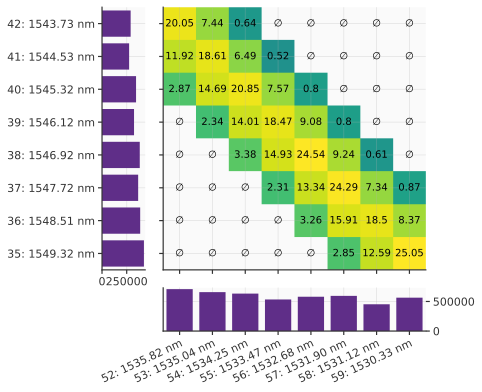

In [47]:
viz.update_colors(dark=False)

fig = plt.figure(figsize = (5,5))

b1 = 0.05
b2 = 0.05
tw = 0.12
width = 1 - 2*b1 - b2 - tw

main_size = [b1 + b2 + tw, b1 + b2 + tw, width, width]
left_bar = [b1, b1 + tw + b2, tw, width]
bottom_bar = [b1 + tw + b2, b1, width, tw]


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)
ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
# setp(ax_main, xticklabels=[])
# ax_bottom_bar.set_xscale('log')
# ax_bottom_bar.grid(which='minor')
# ax_main.grid(which='minor')
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(chA_list_str[::-1])
ax_bottom_bar.set_xticklabels(chB_list_str)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
ax_left_bar.barh(np.arange(len(chA_raw)), chA_raw[::-1])
ax_bottom_bar.bar(np.arange(len(chB_raw)), chB_raw)
ax_bottom_bar.yaxis.tick_right()

Set_rot = np.rot90(np.array(Set))
ax_main.imshow(Set_rot,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set_rot[i][j] == 0:
            label = '∅'
        else:
            label = Set_rot[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
# fig.suptitle('Coincidences and raw count rates for ITU channel pairings')
# plt.savefig("2nm_jsi_dark.svg")

0.86
0.38


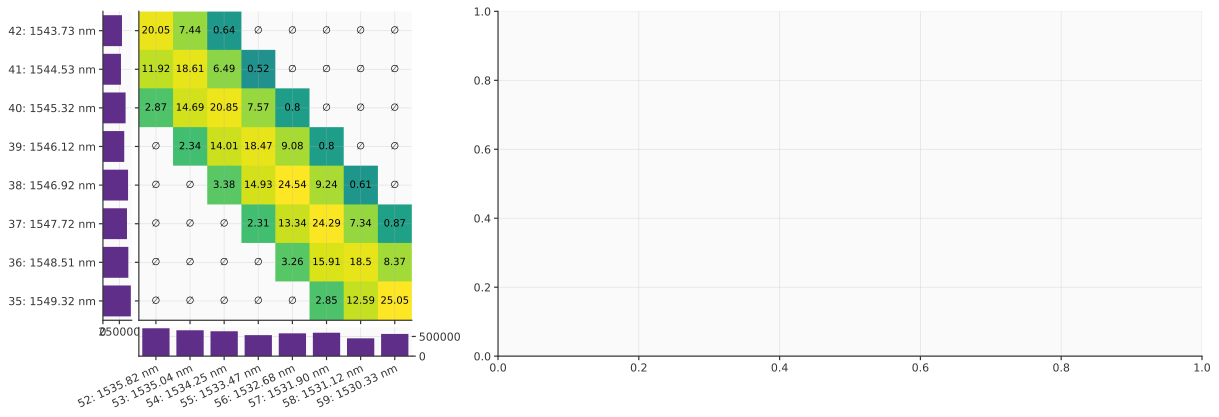

In [93]:
viz.update_colors(dark=False)

fig = plt.figure(figsize=(10,5))



# see note sept 16th 2022 for the layout
b1_1 = 0.02
b1_2 = b1_1/2
b2_1 = 0.02
b2_2 = b2_1/2

tw_1 = 0.08
tw_2 = tw_1/2

l = 0.12
w2 = (1 - 2*b1_2 - 2*b2_2 - 2*tw_2 - l)/2
w2_large = 1 - 2*b1_2

w1 = 1 - 2*b1_1 - tw_1 - b2_1
w1_large = w1 + b2_1 + tw_1


main_size = [b1_2 + b2_2 + tw_2, b1_1 + b2_1 + tw_1, w2, w1]    #[_2,_1, _2, _1]
left_bar = [b1_2, b1_1 + tw_1 + b2_1, tw_2, w1]
bottom_bar = [b1_2 + tw_2 + b2_2, b1_1, w2, tw_1]
main_2 = [b1_2 + tw_2 + b2_2 + w2 + l, b1_1, w2_large, w1_large]

print(w1)
print(w2)


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)
ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
# ax_main = fig.add_axes(main_size, sharey=ax_left_bar)

ax_main_2 = fig.add_axes(main_2)
# setp(ax_main, xticklabels=[])
# ax_bottom_bar.set_xscale('log')
# ax_bottom_bar.grid(which='minor')
# ax_main.grid(which='minor')
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(chA_list_str[::-1])
ax_bottom_bar.set_xticklabels(chB_list_str)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
ax_left_bar.barh(np.arange(len(chA_raw)), chA_raw[::-1])
ax_bottom_bar.bar(np.arange(len(chB_raw)), chB_raw)
ax_bottom_bar.yaxis.tick_right()

Set_rot = np.rot90(np.array(Set))
ax_main.imshow(Set_rot, aspect='auto', norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set_rot[i][j] == 0:
            label = '∅'
        else:
            label = Set_rot[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
# fig.suptitle('Coincidences and raw count rates for ITU channel pairings')
# plt.savefig("2nm_jsi_dark.svg")

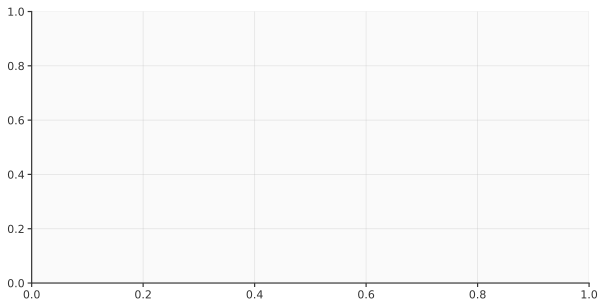

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

### useful for annotated heatmaps: https://matplotlib.org/3.5.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [50]:
Set2 = Set
Set2[7,0] = 21.15
Set2[6,0] = 9.78
Set2[5,0] = 1.55
chA_raw[0] = 370521

Set3 = Set2 + np.random.rand(8,8)
Set3[Set3>1]

array([ 2.79987843,  9.92032405, 19.12138477,  1.87067178,  9.29025757,
       15.12775356,  8.33475093,  2.81260223,  9.53100233, 20.78161046,
        9.67909445,  1.4756114 ,  2.57185741, 11.75084449, 18.64197979,
       11.645439  ,  1.67300612,  2.77801542, 10.55992141, 21.40431897,
       10.17712332,  1.47542981,  1.94920317, 11.29546445, 16.47571636,
        9.62536889,  1.89893684, 10.24154413, 20.32857499,  8.55488517,
        1.17162931, 21.18677272, 10.58461631,  1.31529207])

In [51]:
A = 0.7*(np.random.rand(8,8) - 0.5) + Set2
Q = (A > 0.6)*A
Set4 = Q.round(2)

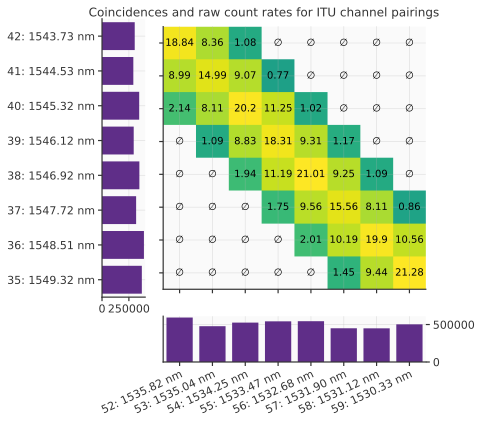

In [54]:
viz.update_colors(dark=False)

fig = plt.figure(figsize = (5,5.3))

b1 = 0.05
b2 = 0.05
tw = 0.12
width = 1 - 2*b1 - b2 - tw

main_size = [b1 + b2 + tw, b1 + b2 + tw, width, width]
left_bar = [b1, b1 + tw + b2, tw, width]
bottom_bar = [b1 + tw + b2, b1, width, tw]


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)
ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
# setp(ax_main, xticklabels=[])
# ax_bottom_bar.set_xscale('log')
# ax_bottom_bar.grid(which='minor')
# ax_main.grid(which='minor')
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(chA_list_str[::-1])
ax_bottom_bar.set_xticklabels(chB_list_str)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
ax_left_bar.barh(np.arange(len(chA_raw)), chA_raw[::-1])
ax_bottom_bar.bar(np.arange(len(chB_raw)), chB_raw)
ax_bottom_bar.yaxis.tick_right()

Set_rot = np.rot90(np.array(Set4))
ax_main.imshow(Set_rot,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set4)))

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set_rot[i][j] == 0:
            label = '∅'
        else:
            label = Set_rot[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
fig.suptitle('Coincidences and raw count rates for ITU channel pairings')
plt.savefig("2nm_jsi_light_f.jpg")